Preparations

In [91]:
# # check API key
# import os

# api_key = os.environ.get("OPENAI_API_KEY")
# if api_key:
#     print("API key is set")
# else:
#     print("API key not found in environment variables")

In [92]:
from mira.openai import OpenAIClient
from mira.sources.sympy_ode.llm_util import execute_template_model_from_sympy_odes, image_file_to_odes_str
client = OpenAIClient()

Found 24 files to process:
  - BIOMD0000000972.png
  - BIOMD0000000964.png
  - BIOMD0000000970.png
  - BIOMD0000000958.png
  - BIOMD0000000971.png
  - BIOMD0000000974.png
  - BIOMD0000000960.png
  - BIOMD0000000976.png
  - BIOMD0000000962.png
  - SAPHIRE.png
  - BIOMD0000000963.png
  - BIOMD0000000977.png
  - odes_to_mira_SEVITHR.png
  - BIOMD0000000991.png
  - BIOMD0000000984.png
  - BIOMD0000000979.png
  - BIOMD0000000978.png
  - BIOMD0000000983.png
  - Dec_2024_epi_scenario1_modelC.png
  - Dec_2024_epi_scenario1_modelB.png
  - BIOMD0000000955.png
  - BIOMD0000000957.png
  - Dec_2024_epi_scenario1_modelA.png
  - BIOMD0000000956.png

Processing: BIOMD0000000972.png


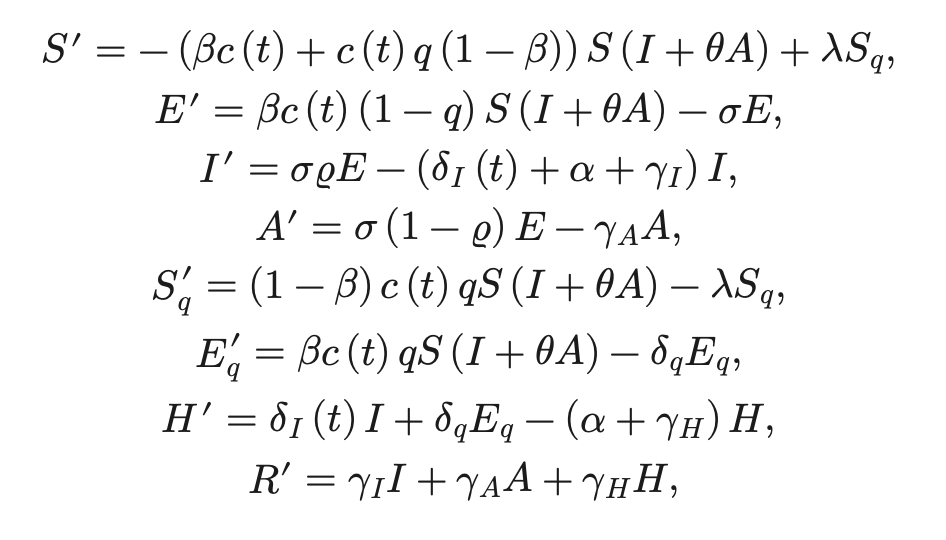


Processing: BIOMD0000000964.png


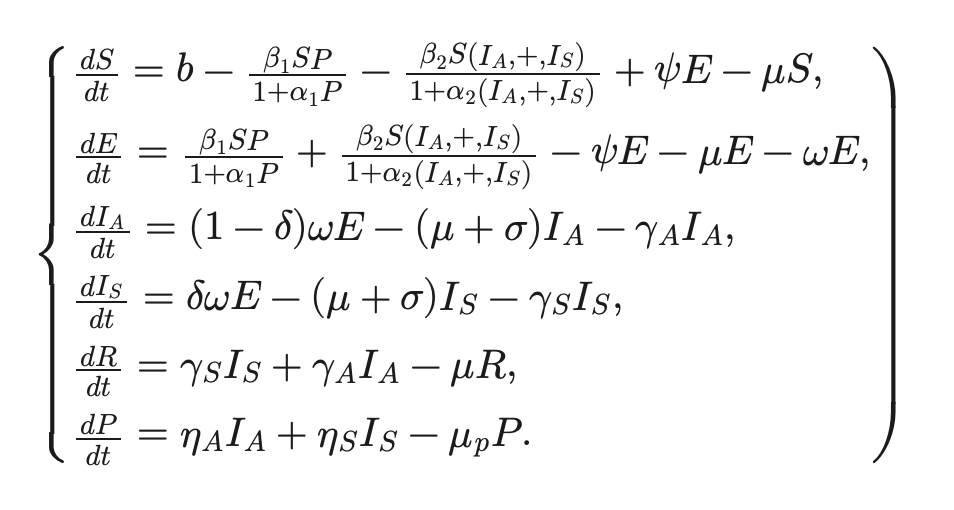


Processing: BIOMD0000000970.png


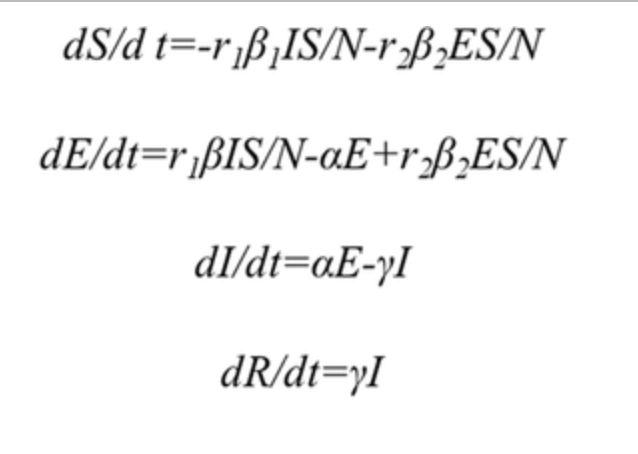


Processing: BIOMD0000000958.png


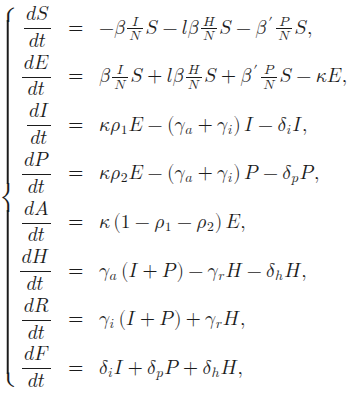


Processing: BIOMD0000000971.png


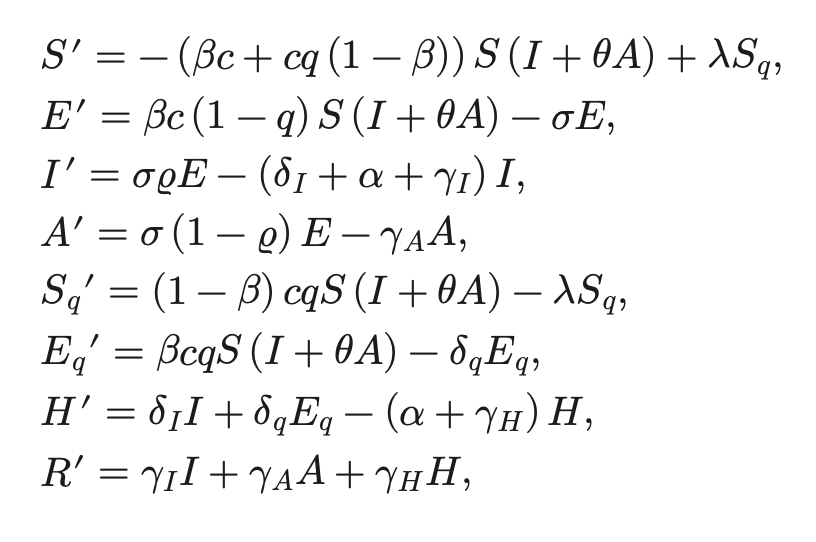


Processing: BIOMD0000000974.png


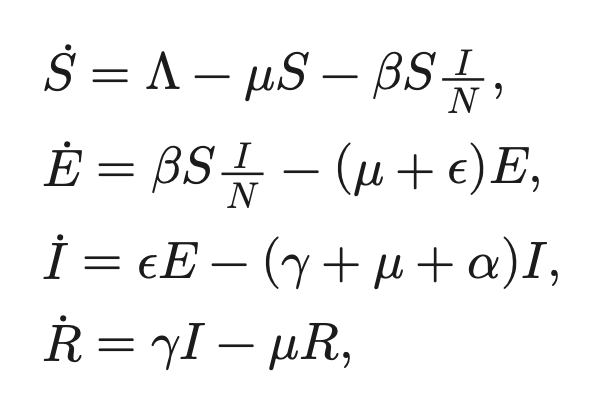


Processing: BIOMD0000000960.png


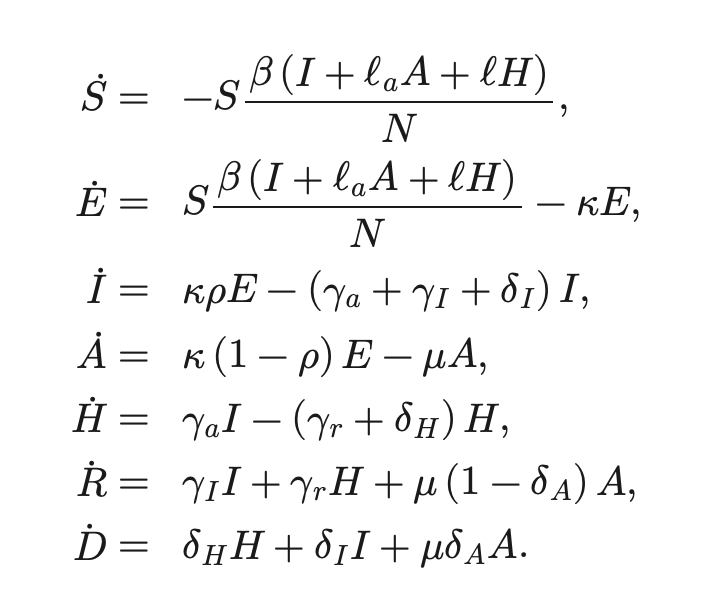


Processing: BIOMD0000000976.png


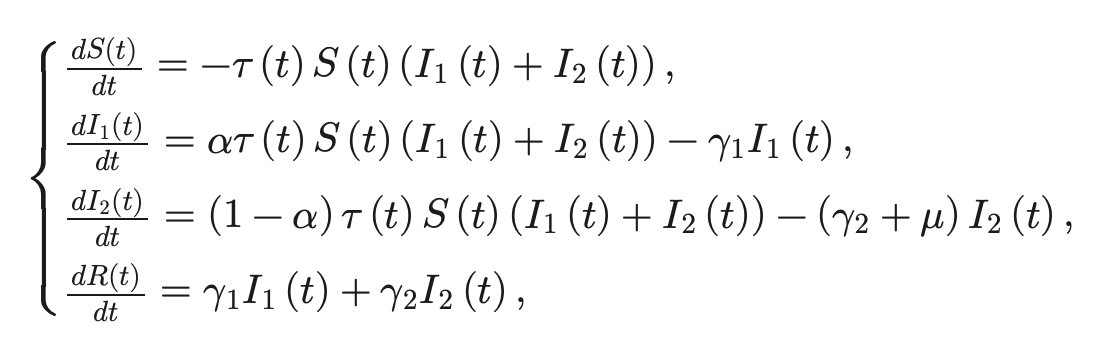


Processing: BIOMD0000000962.png


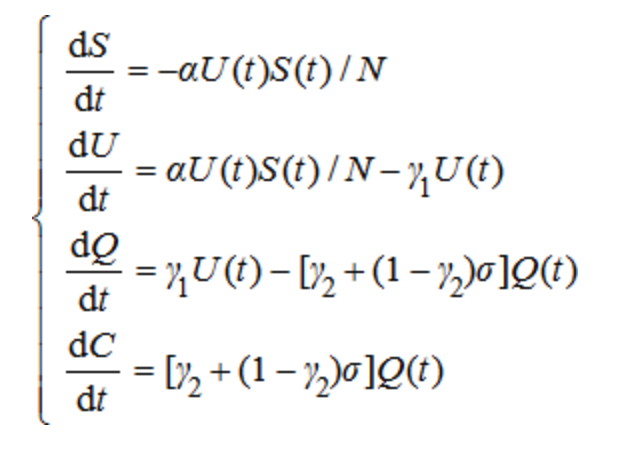


Processing: SAPHIRE.png


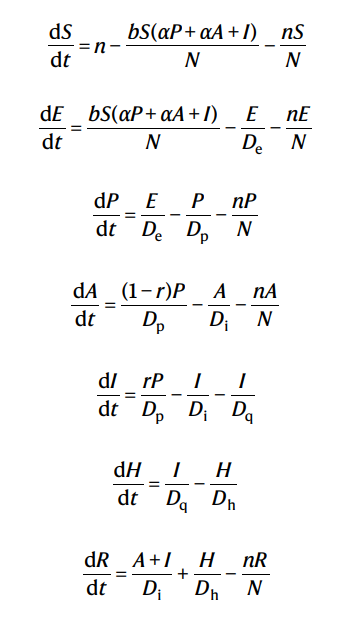


Processing: BIOMD0000000963.png


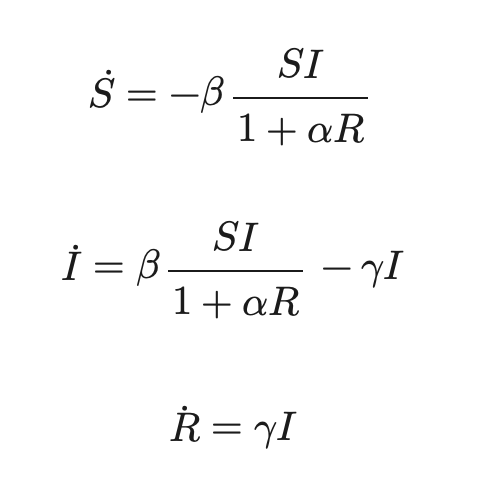


Processing: BIOMD0000000977.png


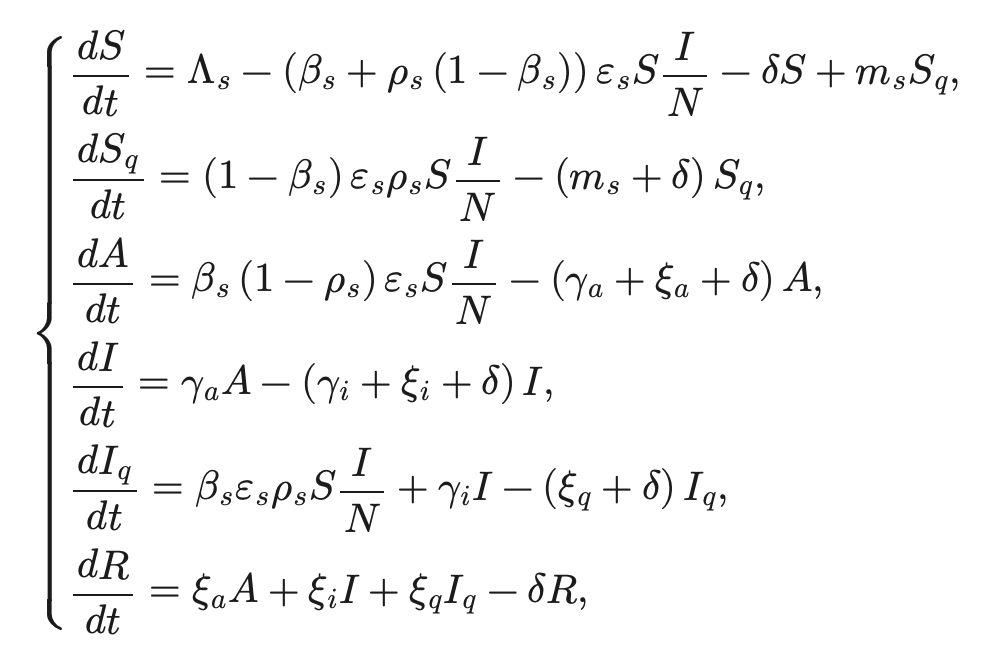


Processing: odes_to_mira_SEVITHR.png


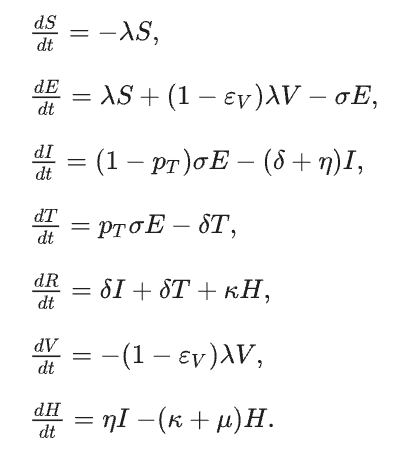


Processing: BIOMD0000000991.png


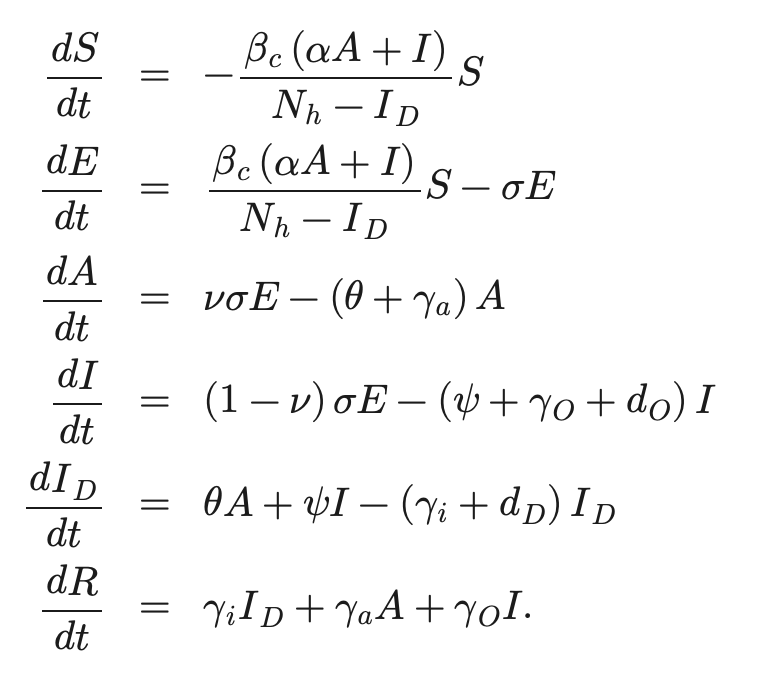


Processing: BIOMD0000000984.png


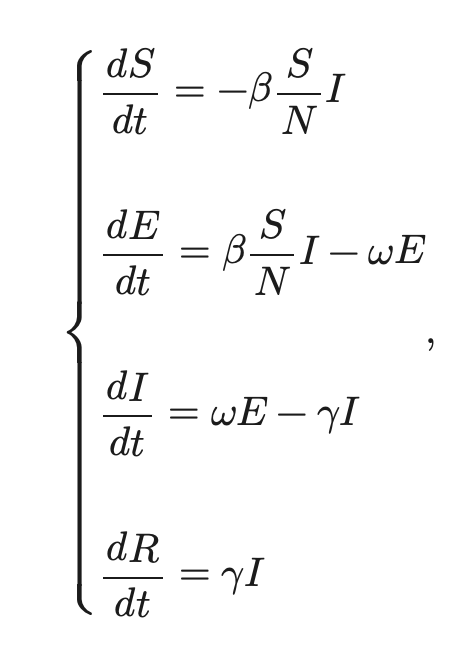


Processing: BIOMD0000000979.png


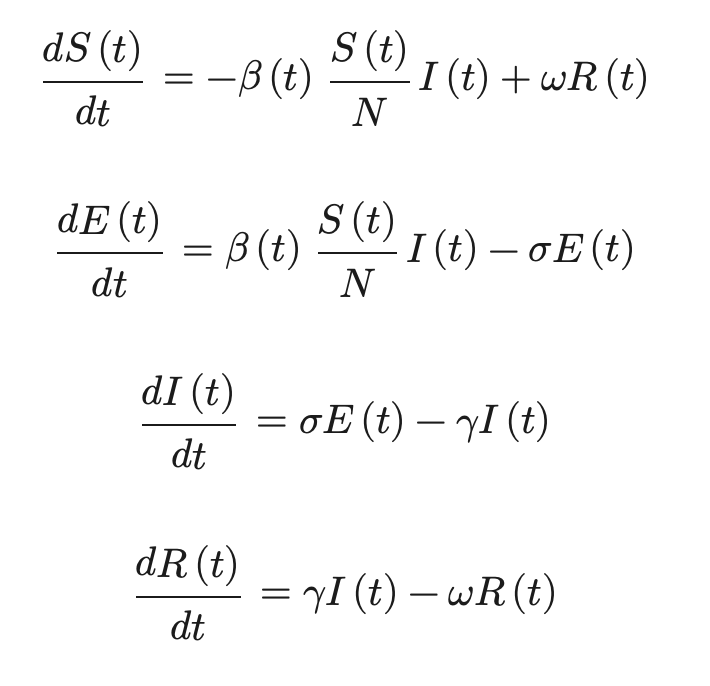


Processing: BIOMD0000000978.png


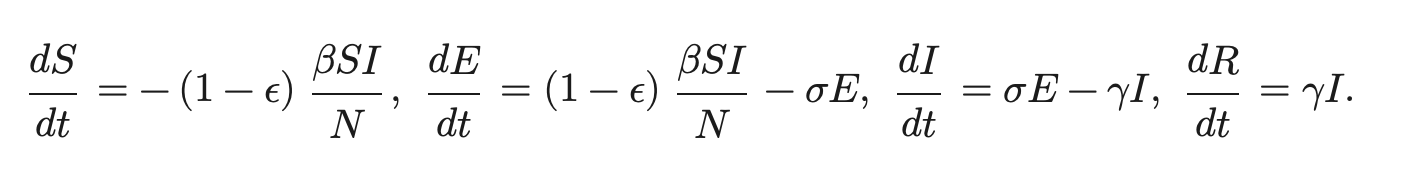


Processing: BIOMD0000000983.png


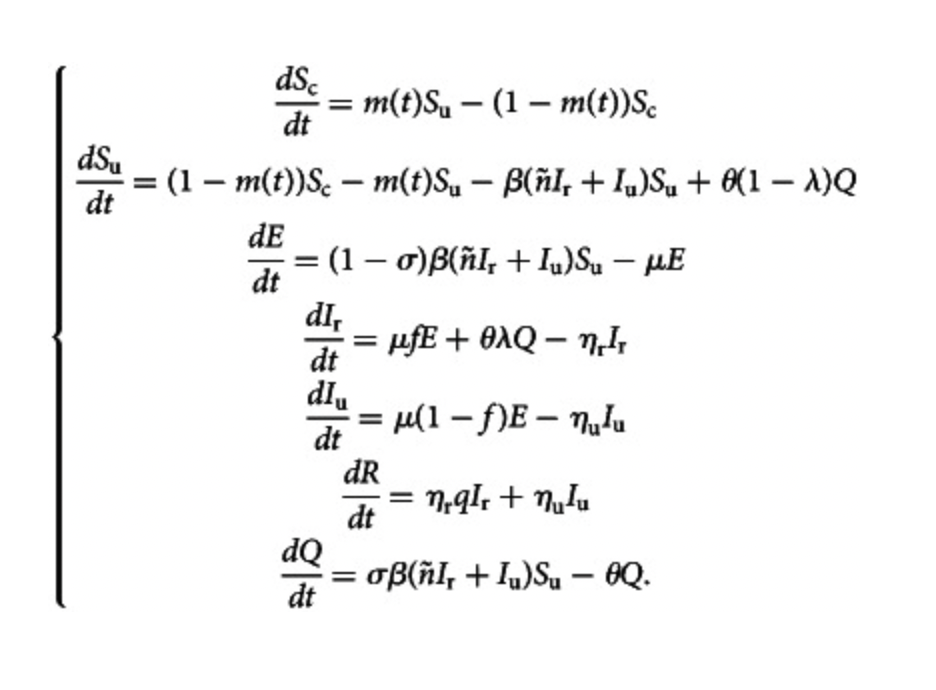


Processing: Dec_2024_epi_scenario1_modelC.png


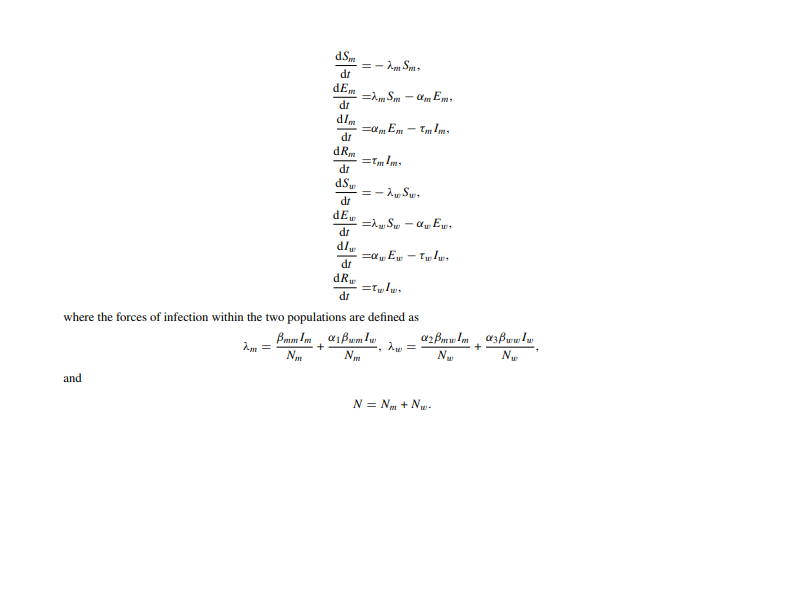


Processing: Dec_2024_epi_scenario1_modelB.png


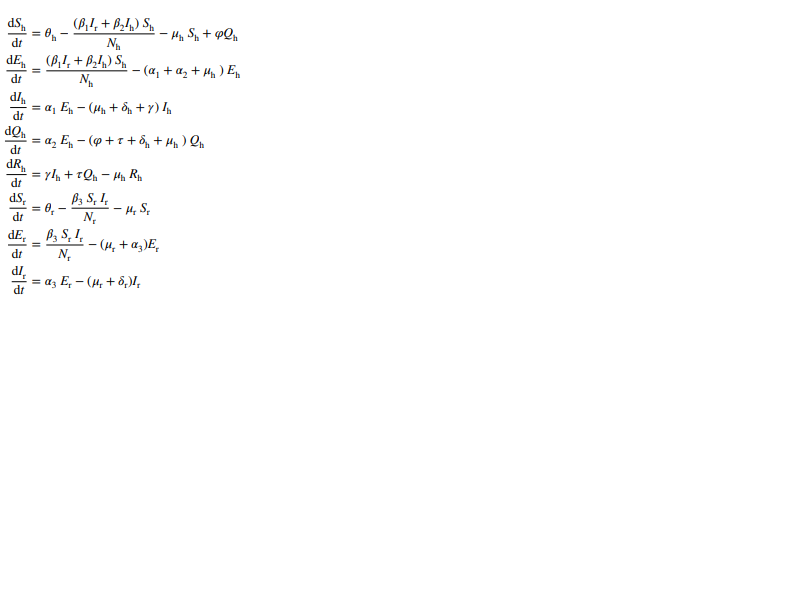


Processing: BIOMD0000000955.png


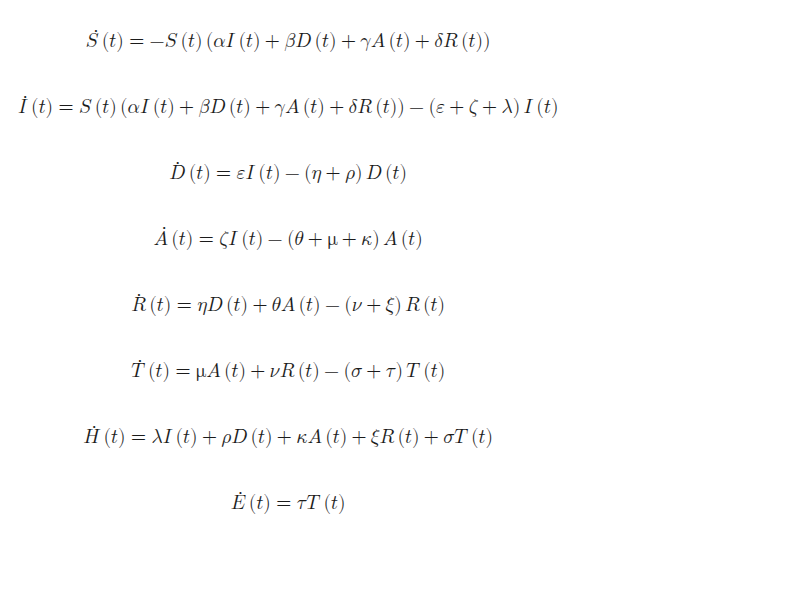


Processing: BIOMD0000000957.png


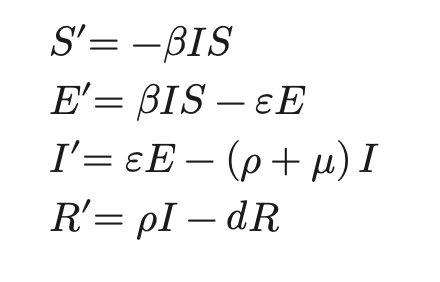


Processing: Dec_2024_epi_scenario1_modelA.png


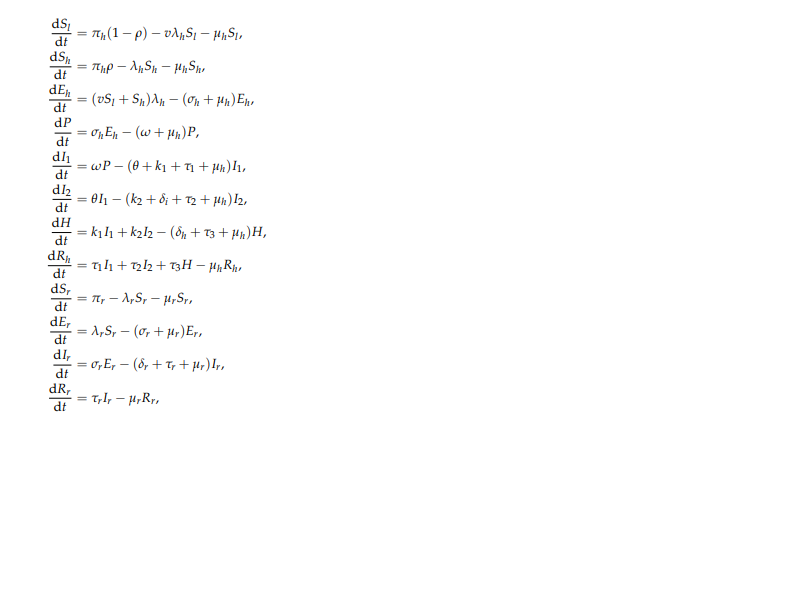


Processing: BIOMD0000000956.png


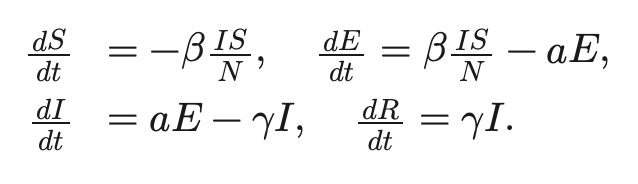

In [93]:
# Extract ODEs from images
import os
from IPython.display import Image, display

image_folder = './images'  

image_files = [f for f in os.listdir(image_folder) if not f.startswith('.')] # images that do not start with a dot in their file name

print(f"Found {len(image_files)} files to process:")
for img_file in image_files:
    print(f"  - {img_file}")

for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    print(f"\nProcessing: {image_file}")
    display(Image(image_path))

In [ ]:
#for one image only:
# ode_str = image_file_to_odes_str(image_path, client=client)
# print(ode_str)

# Note that the LLM sometimes misses to define one of the parameters. When this happens, a human-in-the-loop can quickly edit the output:

# Cleaned version of string above, uncomment to use it
# ode_str = """import sympy

# # Define time variable
# t = sympy.symbols("t")

# # Define the time-dependent variables
# S, E, I, T, R, V, H = sympy.symbols("S E I T R V H", cls=sympy.Function)

# # Define the parameters
# lambda_, epsilon_v, p_T, delta, eta, kappa, mu, sigma = sympy.symbols("lambda_ epsilon_v p_T delta eta kappa mu sigma")

# odes = [
#    sympy.Eq(S(t).diff(t), - lambda_ * S(t)),
#    sympy.Eq(E(t).diff(t), lambda_ * S(t) + (1 - epsilon_v) * lambda_ * V(t) - sigma * E(t)),
#    sympy.Eq(I(t).diff(t), (1 - p_T) * sigma * E(t) - (delta + eta) * I(t)),
#    sympy.Eq(T(t).diff(t), p_T * sigma * E(t) - delta * T(t)),
#    sympy.Eq(R(t).diff(t), delta * I(t) + delta * T(t) + kappa * H(t)),
#    sympy.Eq(V(t).diff(t), - (1 - epsilon_v) * lambda_ * V(t)),
#    sympy.Eq(H(t).diff(t), eta * I(t) - (kappa + mu) * H(t))
#     ]"""

# print(ode_str)

In [102]:
# for multiple images:

all_results = []
failed_extractions = []

for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    print(f"\n{'='*60}")
    print(f"Processing: {image_file}")
    print(f"{'='*60}")
    
    try:        
        ode_str = image_file_to_odes_str(image_path, client)
        print("Extracted odes:")
        print(ode_str[:500])  
        
        template_model = execute_template_model_from_sympy_odes(
            ode_str=ode_str,
            attempt_grounding=True,
            client=client,
            use_multi_agent=True,
            max_correction_iterations=3
        )
        
        concepts_map = template_model.get_concepts_map()
        
        result = {
            'image_file': image_file,
            'template_model': template_model,
            'status': 'success'
        }
        all_results.append(result)
        
        print(f"Successfully extracted from {image_file}")
        print(f"  - Templates: {len(template_model.templates)}")
        print(f"  - Concepts: {len(concepts_map)}")
        print(f"  - Parameters: {len(template_model.parameters)}")
        
    except Exception as e:
        print(f"✗ Failed to process {image_file}: {str(e)}")
        failed_extractions.append({
            'image_file': image_file,
            'error': str(e),
            'status': 'failed'
        })

print(f"\n{'='*60}")
print("PROCESSING SUMMARY")
print(f"{'='*60}")
print(f"Total files: {len(image_files)}")
print(f"Successful extractions: {len(all_results)}")
print(f"Failed extractions: {len(failed_extractions)}")

if failed_extractions:
    print(f"\nFailed files:")
    for failure in failed_extractions:
        print(f"  - {failure['image_file']}: {failure['error']}")
        



Processing: BIOMD0000000972.png


INFO: [2025-08-26 21:54:28] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, A, S_q, E_q, H, R = sympy.symbols("S E I A S_q E_q H R", cls=sympy.Function)

# Define the parameters
beta, c, q, sigma, delta_I, alpha, gamma_I, lambda_ = sympy.symbols("beta c q sigma delta_I alpha gamma_I lambda")
gamma_A, delta_q = sympy.symbols("gamma_A delta_q gamma_H")

odes = [
    sympy.Eq(S(t).diff(t), - (beta * c(t) + c(t) * q * (1 - beta)) * S(t) * (I(t) + A(t)) + lambda_ * S_q


INFO: [2025-08-26 21:54:35] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 21:54:45] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 1: Found errors: ['1. Syntax error in the definition of the ODE for S(t): missing closing bracket for the sympy.Eq function.', '2. The delta_I is defined as a symbol but used as a function when computing d/dt of I: delta_I(t) is inconsistent with its definition.', '3. The gamma_H parameter is not defined in the parameters section, it is used in the ODE for H(t).']
Applied code correction


INFO: [2025-08-26 21:55:07] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 2: Found errors: ["The parameter 'c' is defined as a function, which is inconsistent with most other parameters that are treated as constants.", "The identifiers for 'I' and 'A' should not both use 'ido: 0000511' as it can cause confusion since they are distinct states."]
Applied code correction


INFO: [2025-08-26 21:55:08] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Validation passed on iteration 3
✗ Failed to process BIOMD0000000972.png: Error while executing the code: 'Symbol' object is not callable

Processing: BIOMD0000000964.png


INFO: [2025-08-26 21:55:16] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, IA, IS, R, P = sympy.symbols("S E IA IS R P", cls=sympy.Function)

# Define the parameters
b, beta1, alpha1, beta2, alpha2, psi, mu, delta, omega, sigma, gamma_A = sympy.symbols("b beta1 alpha1 beta2 alpha2 psi mu delta omega sigma gamma_A")
eta = sympy.symbols("eta")

odes = [
    sympy.Eq(S(t).diff(t), b - beta1 * S(t) * P(t) / (1 + alpha1 * P(t)) - beta2 * S(t) * (IA(t) + IS(t)) / (1 + alp


INFO: [2025-08-26 21:55:21] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 21:55:36] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Raw response: ```json
{
    "has_errors": true,
    "errors": [
        "Syntax error: Missing closing parenthesis in the first equation of the ODE system.",
        "Parameter consistency: Parameter 'mu' is used in the equations but is not defined in the context.",
        "Concept grounding accuracy: The identi...
Successfully extracted from BIOMD0000000964.png
  - Templates: 17
  - Concepts: 6
  - Parameters: 12

Processing: BIOMD0000000970.png


INFO: [2025-08-26 21:55:41] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, R = sympy.symbols("S E I R", cls=sympy.Function)

# Define the parameters
r1, r2, beta1, beta2, alpha, gamma, N = sympy.symbols("r1 r2 beta1 beta2 alpha gamma N")

odes = [
    sympy.Eq(S(t).diff(t), -r1 * beta1 * S(t) * I(t) / N - r2 * beta2 * E(t) * S(t) / N),
    sympy.Eq(E(t).diff(t), r1 * beta1 * S(t) * I(t) / N - alpha * E(t) + r2 * beta2 * E(t) * S(t) / N),
    sympy.Eq(I(t).diff(t), alpha * E(t)


INFO: [2025-08-26 21:55:45] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 21:55:46] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Validation passed on iteration 1
Successfully extracted from BIOMD0000000970.png
  - Templates: 4
  - Concepts: 4
  - Parameters: 7

Processing: BIOMD0000000958.png


INFO: [2025-08-26 21:55:56] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, P, A, H, R, F = sympy.symbols("S E I P A H R F", cls=sympy.Function)

# Define the parameters
beta, l, beta_prime, kappa_1, gamma_alpha, delta_1, kappa_2, gamma_i, delta_2, gamma_r = sympy.symbols("beta l beta_prime kappa_1 gamma_alpha delta_1 kappa_2 gamma_i delta_2 gamma_r")

odes = [
    sympy.Eq(S(t).diff(t), -beta * I(t) * S(t) / N - l * beta * H(t) / N - beta_prime * P(t) * S(t)),
    sympy.Eq(E(t


INFO: [2025-08-26 21:56:01] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 21:56:13] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Raw response: ```json
{
    "has_errors": true,
    "errors": [
        "Variable 'N' is undefined in the equations.",
        "Variable 'k' is undefined in the equations.",
        "Variable 'rho_1' is undefined in the equations.",
        "Variable 'delta_h' is undefined in the equations."
    ],
    "corrected...
✗ Failed to process BIOMD0000000958.png: Error while executing the code: name 'N' is not defined

Processing: BIOMD0000000971.png


INFO: [2025-08-26 21:56:21] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, A, S_q, E_q, H, R = sympy.symbols("S E I A S_q E_q H R", cls=sympy.Function)

# Define the parameters
beta, c, q, lambda_, sigma, delta_I, alpha, gamma_I, gamma_A, delta_q, gamma_H = sympy.symbols("beta c q lambda sigma delta_I alpha gamma_I gamma_A delta_q gamma_H")

odes = [
    sympy.Eq(S(t).diff(t), - (beta * c + q * (1 - beta)) * S(t) * (I(t) + theta * A(t)) + lambda_ * S_q(t)),
    sympy.Eq(E(t).d


INFO: [2025-08-26 21:56:28] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 21:56:40] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Raw response: ```json
{
    "has_errors": true,
    "errors": [
        "Undefined variable 'theta' used in the equation for dS/dt.",
        "Identifiers for 'A' and 'I' in concept data should not reference the same ID."
    ],
    "corrected_code": "# Define time variable\nimport sympy\n\nt = sympy.symbols(\"t\...
✗ Failed to process BIOMD0000000971.png: Error while executing the code: name 'theta' is not defined

Processing: BIOMD0000000974.png


INFO: [2025-08-26 21:56:44] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, R = sympy.symbols("S E I R", cls=sympy.Function)

# Define the parameters
lambda_, mu, beta, epsilon, gamma, alpha = sympy.symbols("lambda mu beta epsilon gamma alpha")
N = sympy.symbols("N")

odes = [
    sympy.Eq(S(t).diff(t), lambda_ - mu * S(t) - beta * S(t) * I(t) / N),
    sympy.Eq(E(t).diff(t), beta * S(t) * I(t) / N - (mu + epsilon) * E(t)),
    sympy.Eq(I(t).diff(t), epsilon * E(t) - (gamma + m


INFO: [2025-08-26 21:56:47] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 21:56:53] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 1: Found errors: ["Missing import: 'import sympy' should be added at the top of the code.", "The variable 'N' is defined but is not given a numerical or symbolic value in the context of the model, which could lead to issues during evaluation.", 'The equation for dR/dt has negative contributions from mu*R(t), which might not accurately reflect recovery dynamics without further context.']
Applied code correction


INFO: [2025-08-26 21:56:54] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Validation passed on iteration 2
Successfully extracted from BIOMD0000000974.png
  - Templates: 8
  - Concepts: 4
  - Parameters: 7

Processing: BIOMD0000000960.png


INFO: [2025-08-26 21:57:02] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, A, H, R, D = sympy.symbols("S E I A H R D", cls=sympy.Function)

# Define the parameters
beta, kappa, gamma_a, gamma_I, delta_I, mu, rho, delta_H, gamma_r, delta_A, N = sympy.symbols("beta kappa gamma_a gamma_I delta_I mu rho delta_H gamma_r delta_A N")

odes = [
    sympy.Eq(S(t).diff(t), - S(t) * beta * (I(t) + l_a * A(t) + l * H(t)) / N),
    sympy.Eq(E(t).diff(t), S(t) * beta * (I(t) +


INFO: [2025-08-26 21:57:07] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 21:57:24] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Raw response: ```json
{
    "has_errors": true,
    "errors": [
        "Undefined variable 'l_a' used in the equations.",
        "Undefined variable 'l' used in the equations.",
        "Both 'I' and 'A' are assigned the same identifiers ('ido': '0000511'), which could cause confusion regarding their distinct c...
✗ Failed to process BIOMD0000000960.png: Error while executing the code: name 'l_a' is not defined

Processing: BIOMD0000000976.png


INFO: [2025-08-26 21:57:29] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, I1, I2, R = sympy.symbols("S I1 I2 R", cls=sympy.Function)

# Define the parameters
tau, alpha, gamma1, gamma2, mu = sympy.symbols("tau alpha gamma1 gamma2 mu")

odes = [
    sympy.Eq(S(t).diff(t), -tau(t) * S(t) * (I1(t) + I2(t))),
    sympy.Eq(I1(t).diff(t), alpha(t) * tau(t) * S(t) * (I1(t) + I2(t)) - gamma1 * I1(t)),
    sympy.Eq(I2(t).diff(t), (1 - alpha) * tau(t) * S(t) * (I1(t) + I2(t)) - (gamma2 + mu)


INFO: [2025-08-26 21:57:32] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 21:57:49] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Raw response: ```json
{
    "has_errors": true,
    "errors": [
        "tau, alpha, gamma1, and gamma2 are defined as parameters but tau is used as a time-dependent function in the ODEs, which is inconsistent.",
        "I1 and I2 share the same identifier (ido: 0000511). This may lead to confusion or errors in ...
✗ Failed to process BIOMD0000000976.png: Error while executing the code: 'Symbol' object is not callable

Processing: BIOMD0000000962.png


INFO: [2025-08-26 21:57:53] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, U, Q, C = sympy.symbols("S U Q C", cls=sympy.Function)

# Define the parameters
alpha, gamma_1, gamma_2, sigma, N = sympy.symbols("alpha gamma_1 gamma_2 sigma N")

odes = [
    sympy.Eq(S(t).diff(t), -alpha * U(t) * S(t) / N),
    sympy.Eq(U(t).diff(t), alpha * U(t) * S(t) / N - gamma_1 * U(t)),
    sympy.Eq(Q(t).diff(t), gamma_1 * U(t) - [gamma_2 + (1 - gamma_2) * sigma] * Q(t)),
    sympy.Eq(C


INFO: [2025-08-26 21:57:56] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 21:58:07] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Raw response: After reviewing the provided extraction for potential errors, I found the following issues:

1. **Execution Errors**: There are no missing imports, undefined variables, or syntax errors in the code.
   
2. **Parameter Consistency**: All parameters (`alpha`, `gamma_1`, `gamma_2`, `sigma`, `N`) are de...
✗ Failed to process BIOMD0000000962.png: Error while executing the code: can't multiply sequence by non-int of type 'Q'

Processing: SAPHIRE.png


INFO: [2025-08-26 21:58:15] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, P, A, I, H, R = sympy.symbols("S E P A I H R", cls=sympy.Function)

# Define the parameters
n, b, alpha, r, N, D_e, D_p, D_i, D_q, D_h = sympy.symbols("n b alpha r N D_e D_p D_i D_q D_h")

odes = [
    sympy.Eq(S(t).diff(t), n - b * (alpha * P(t) + alpha * A(t) + I(t)) / N - n * S(t) / N),
    sympy.Eq(E(t).diff(t), b * S(t) * (alpha * P(t) + alpha * A(t) + I(t)) / N - E(t) / D_e - n * E(t) /


INFO: [2025-08-26 21:58:20] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 21:58:34] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Raw response: ```json
{
    "has_errors": true,
    "errors": [
        "Variable A is duplicated in identifiers, should have distinct identifiers.",
        "Variable P is repeated in identifiers, it appears for both 'P' and 'A'. Should have unique identifiers based on context."
    ],
    "corrected_code": "imp...
Successfully extracted from SAPHIRE.png
  - Templates: 17
  - Concepts: 7
  - Parameters: 10

Processing: BIOMD0000000963.png


INFO: [2025-08-26 21:58:37] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, I, R = sympy.symbols("S I R", cls=sympy.Function)

# Define the parameters
beta, alpha, gamma = sympy.symbols("beta alpha gamma")

odes = [
    sympy.Eq(S(t).diff(t), - beta * S(t) * I(t) / (1 + alpha * R(t))),
    sympy.Eq(I(t).diff(t), beta * S(t) * I(t) / (1 + alpha * R(t)) - gamma * I(t)),
    sympy.Eq(R(t).diff(t), gamma * I(t))
]


INFO: [2025-08-26 21:58:40] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 21:58:45] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 1: Found errors: ['Missing import statement for sympy.', "The parameter 'alpha' is not defined in the context data.", "The equations involve both S, I, and R as functions of time, which is correct, but the damping factor 'gamma' must be checked against the definition in the context for consistency."]
Applied code correction


INFO: [2025-08-26 21:58:46] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Validation passed on iteration 2
Successfully extracted from BIOMD0000000963.png
  - Templates: 2
  - Concepts: 3
  - Parameters: 3

Processing: BIOMD0000000977.png


INFO: [2025-08-26 21:58:54] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, Sq, A, I, Iq, R = sympy.symbols("S Sq A I Iq R", cls=sympy.Function)

# Define the parameters
Lambda_s, beta_s, rho_s, epsilon_s, N, m_s, delta, gamma_a, xi_a, gamma_i, xi_i, xi_q = sympy.symbols("Lambda_s beta_s rho_s epsilon_s N m_s delta gamma_a xi_a gamma_i xi_i xi_q")

odes = [
    sympy.Eq(S(t).diff(t), Lambda_s - (beta_s + rho_s * (1 - beta_s)) * epsilon_s * S(t) * I(t) / N - delta * S(t) + m_s * S(t))


INFO: [2025-08-26 21:58:57] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 21:59:09] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Raw response: {
    "has_errors": true,
    "errors": [
        "Import statement for sympy is missing.",
        "Parameters 'm_s' and 'delta' are declared but not used directly in the equations.",
        "The parameter 'gamma_a' does not account for interaction terms that might influence 'A(t)’ through both in...
Successfully extracted from BIOMD0000000977.png
  - Templates: 17
  - Concepts: 6
  - Parameters: 12

Processing: odes_to_mira_SEVITHR.png


INFO: [2025-08-26 21:59:15] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, T, R, V, H = sympy.symbols("S E I T R V H", cls=sympy.Function)

# Define the parameters
lambda_, epsilon, p_T, delta, eta, kappa, mu = sympy.symbols("lambda epsilon p_T delta eta kappa mu")

odes = [
    sympy.Eq(S(t).diff(t), -lambda_ * S(t)),
    sympy.Eq(E(t).diff(t), lambda_ * S(t) + (1 - epsilon) * lambda_ * V(t) - sigma * E(t)),
    sympy.Eq(I(t).diff(t), (1 - p_T) * sigma * E(t) - (delta + eta) 


INFO: [2025-08-26 21:59:19] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 21:59:36] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 1: Found errors: ["The parameter 'sigma' is used in the equations but is not defined.", "The identifier for 'R' is duplicated with the identifier for 'T'; they both have 'ido' '0000592'."]
Applied code correction


INFO: [2025-08-26 21:59:51] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 2: Found errors: ["Inconsistent identifiers for 'S' and 'V': Both have ID '0000514', which may cause confusion.", "Inconsistent identifiers for 'I' and 'H': Both have ID '0000511', which may cause confusion."]
Applied code correction


INFO: [2025-08-26 22:00:03] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 3: Found errors: ["Parameter 'V' has conflicting identifiers: 'ido' '0000514' which matches 'S' and should be unique.", "Parameter 'H' has conflicting identifiers: 'ido' '0000511' which matches 'I' and should be unique."]
Applied code correction
Successfully extracted from odes_to_mira_SEVITHR.png
  - Templates: 10
  - Concepts: 7
  - Parameters: 8

Processing: BIOMD0000000991.png


INFO: [2025-08-26 22:00:09] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, A, I, ID, R = sympy.symbols("S E A I ID R", cls=sympy.Function)

# Define the parameters
beta_c, alpha, Nh, ID, sigma, nu, theta, gama_a, d_o, gama_i, d_D, psi, gama_o = sympy.symbols("beta_c alpha Nh ID sigma nu theta gama_a d_o gama_i d_D psi gama_o")

odes = [
    sympy.Eq(S(t).diff(t), - beta_c * (alpha * A(t) + I(t)) / (Nh - ID) * S(t)),
    sympy.Eq(E(t).diff(t), beta_c * (alpha * A(t) + I(t)) / (Nh 


INFO: [2025-08-26 22:00:14] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 22:00:28] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Raw response: ```json
{
    "has_errors": true,
    "errors": [
        "Variable 'ID' is defined as both a parameter and a state variable, which causes a conflict.",
        "The identifiers for 'A' and 'I' are the same ('0000511'), which is incorrect as each should have a unique identifier."
    ],
    "correct...
✗ Failed to process BIOMD0000000991.png: Error while executing the code: 'Symbol' object is not callable

Processing: BIOMD0000000984.png


INFO: [2025-08-26 22:00:32] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, R = sympy.symbols("S E I R", cls=sympy.Function)

# Define the parameters
beta, omega, gamma, N = sympy.symbols("beta omega gamma N")

odes = [
    sympy.Eq(S(t).diff(t), - beta * S(t) / N * I(t)),
    sympy.Eq(E(t).diff(t), beta * S(t) / N * I(t) - omega * E(t)),
    sympy.Eq(I(t).diff(t), omega * E(t) - gamma * I(t)),
    sympy.Eq(R(t).diff(t), gamma * I(t))
]


INFO: [2025-08-26 22:00:36] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 22:00:42] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 1: Found errors: ['Missing import statements for sympy.', "The variable 'N' is declared but not used in a context representing a total population where 'S + E + I + R = N'."]
Applied code correction


INFO: [2025-08-26 22:00:43] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Validation passed on iteration 2
Successfully extracted from BIOMD0000000984.png
  - Templates: 3
  - Concepts: 4
  - Parameters: 4

Processing: BIOMD0000000979.png


INFO: [2025-08-26 22:00:47] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, R = sympy.symbols("S E I R", cls=sympy.Function)

# Define the parameters
beta, sigma, gamma, omega, N = sympy.symbols("beta sigma gamma omega N")

odes = [
    sympy.Eq(S(t).diff(t), - beta(t) * S(t) / N * I(t) + omega * R(t)),
    sympy.Eq(E(t).diff(t), beta(t) * S(t) / N * I(t) - sigma * E(t)),
    sympy.Eq(I(t).diff(t), sigma * E(t) - gamma * I(t)),
    sympy.Eq(R(t).diff(t), gamma * I(t) - omega * 


INFO: [2025-08-26 22:00:52] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 22:01:00] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 1: Found errors: ["Missing imports for 'sympy' module.", 'Time-dependent variables (S, E, I, R) are not correctly defined as functions of time, they should be defined as S(t), E(t), I(t), R(t) instead of using sympy.Function without parentheses.', 'The use of beta, sigma, gamma, and omega as time-dependent parameters is inconsistent. They should be defined as symbols not functions. If they are constants, remove the parentheses.']
Applied code correction


INFO: [2025-08-26 22:01:10] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 2: Found errors: ["In the equation for R(t), the term 'omega * R(t)' should be a positive term for 'R(t).diff(t)', indicating an increase in R(t) due to I(t). The current formulation suggests a decrease which is incorrect.", "The second equation incorrectly uses 'I(t)' in both terms; it should use an appropriate population variable instead if following a standard SIR model. It should be 'beta * S(t) * I(t) / N' and not have 'I(t)' as part of the source term."]
Applied code correction


INFO: [2025-08-26 22:01:18] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 3: Found errors: ["The equation for R(t) has an error: It should be 'gamma * I(t) - omega * R(t)' instead of 'gamma * I(t) + omega * R(t)' since R(t) should decrease by omega when infected individuals recover."]
Applied code correction
✗ Failed to process BIOMD0000000979.png: Error while executing the code: exec() arg 1 must be a string, bytes or code object

Processing: BIOMD0000000978.png


INFO: [2025-08-26 22:01:22] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, R = sympy.symbols("S E I R", cls=sympy.Function)

# Define the parameters
beta, sigma, gamma, epsilon, N = sympy.symbols("beta sigma gamma epsilon N")

odes = [
    sympy.Eq(S(t).diff(t), - (1 - epsilon) * beta * S(t) * I(t) / N),
    sympy.Eq(E(t).diff(t), (1 - epsilon) * beta * S(t) * I(t) / N - sigma * E(t)),
    sympy.Eq(I(t).diff(t), sigma * E(t) - gamma * I(t)),
    sympy.Eq(R(t).dif


INFO: [2025-08-26 22:01:29] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 22:01:30] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Validation passed on iteration 1
Successfully extracted from BIOMD0000000978.png
  - Templates: 3
  - Concepts: 4
  - Parameters: 5

Processing: BIOMD0000000983.png


INFO: [2025-08-26 22:01:39] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
s_c, s_u, E, I_r, I_u, R, Q = sympy.symbols("s_c s_u E I_r I_u R Q", cls=sympy.Function)

# Define the parameters
m, beta, sigma, theta, lambda_, mu, f, eta_r, eta_u, q = sympy.symbols("m beta sigma theta lambda mu f eta_r eta_u q")

odes = [
    sympy.Eq(s_c(t).diff(t), m(t) * s_u(t) - (1 - m(t)) * s_c(t)),
    sympy.Eq(s_u(t).diff(t), (1 - m(t)) * s_c(t) - m(t) * s_u(t) - beta * (eta_r * I_r(t) +


INFO: [2025-08-26 22:01:48] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 22:02:05] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Raw response: ```json
{
    "has_errors": true,
    "errors": [
        "Variable 'm' is not defined as a function, it should be defined similar to the other variables.",
        "The 's_c' and 's_u' identifiers in concept data are the same ('0000514'), which indicates that they may refer to the same entity, pote...
✗ Failed to process BIOMD0000000983.png: Error while executing the code: 'Symbol' object is not callable

Processing: Dec_2024_epi_scenario1_modelC.png


INFO: [2025-08-26 22:02:13] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
import sympy

# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
s_m, e_m, i_m, r_m, s_w, e_w, i_w, r_w = sympy.symbols("s_m e_m i_m r_m s_w e_w i_w r_w", cls=sympy.Function)

# Define the parameters
lambda_m, alpha_m, tau_m, sigma_m = sympy.symbols("lambda_m alpha_m tau_m sigma_m")
lambda_w, alpha_w, tau_w, sigma_w = sympy.symbols("lambda_w alpha_w tau_w sigma_w")
N_m, N_w = sympy.symbols("N_m N_w")

# Define the ODEs
odes = [
    sympy.Eq(s_m(t).diff(t), - lam


INFO: [2025-08-26 22:02:18] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 22:02:19] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Validation passed on iteration 1
Successfully extracted from Dec_2024_epi_scenario1_modelC.png
  - Templates: 8
  - Concepts: 8
  - Parameters: 8

Processing: Dec_2024_epi_scenario1_modelB.png


INFO: [2025-08-26 22:02:31] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
import sympy

# Define time variable
r = sympy.symbols("r")

# Define the time-dependent variables
S_h, E_h, I_h, Q_h, R_h = sympy.symbols("S_h E_h I_h Q_h R_h", cls=sympy.Function)

# Define the parameters
beta_1, beta_2, alpha_1, alpha_2, gamma_h, mu_h, phi, theta, beta_3, N_h, N_t, mu, alpha_3, delta_h = sympy.symbols("beta_1 beta_2 alpha_1 alpha_2 gamma_h mu_h phi theta beta_3 N_h N_t mu alpha_3 delta_h")

odes = [
    sympy.Eq(S_h(r).diff(r), beta_1 * I_h(r) + beta_2 * I_h(r) * S_h(r) / N_h


INFO: [2025-08-26 22:02:37] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 22:02:48] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 1: Found errors: ["Variable 'omega_h' is used but not defined in the parameters.", 'Duplicate definitions for S_h(r).diff(r) and E_h(r).diff(r) found in ODEs.']
Applied code correction


INFO: [2025-08-26 22:02:52] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 502 Bad Gateway"
INFO: [2025-08-26 22:02:52] openai._base_client - Retrying request to /chat/completions in 0.413253 seconds
INFO: [2025-08-26 22:03:11] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 2: Found errors: ['The ODE list contains duplicate equations for S_h and E_h, which will cause conflicts.', "The identifiers for Q_h in the concept data are inconsistent; both I_h and Q_h share the same identifier 'ido: 0000511'.", 'The ODEs for S_h and Q_h are inconsistent with the typical modeling structure for SEIR-type models.']
Applied code correction


INFO: [2025-08-26 22:03:22] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 3: Found errors: ['Duplicate equations for Q_h and I_h: There are conflicting definitions for Q_h and I_h, which could lead to ambiguity.', 'The parameter usage for beta_3 in the equation for Q_h is inconsistent. It appears to use susceptible individuals (S_h) rather than a direct dependency.', 'Omitted parameters in equations: Check if all necessary parameters are depicted correctly.', 'The usage of delta_h in both Q_h equations may create confusion as it denotes different roles.']
Applied code correction
Successfully extracted from Dec_2024_epi_scenario1_modelB.png
  - Templates: 11
  - Concepts: 5
  - Parameters: 14

Processing: BIOMD0000000955.png


INFO: [2025-08-26 22:03:30] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, I, D, A, R, T, H, E = sympy.symbols("S I D A R T H E", cls=sympy.Function)

# Define the parameters
alpha, beta, gamma, delta, epsilon, zeta, lambda_, eta, rho, theta, mu, kappa, nu, xi, sigma, tau, lambda_ = sympy.symbols("alpha beta gamma delta epsilon zeta lambda eta rho theta mu kappa nu xi sigma tau lambda")

odes = [
    sympy.Eq(S(t).diff(t), -S(t) * (alpha * I(t) + beta * D(t) + gamma * A(t) + delta *


INFO: [2025-08-26 22:03:36] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 22:03:58] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 1: Found errors: ['Import error: sympy not imported.', 'Variable lambda_ is defined twice in parameters.', "The identifier for D is incorrectly labeled as '0000511', which matches I and A; should be unique.", 'Parameter consistency: the variable names do not match their defined contexts in concept data (e.g., I, A, D all have the same identifier).']
Applied code correction


INFO: [2025-08-26 22:04:14] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 2: Found errors: ["Identifier 'T' is defined multiple times with the same ID '0000592'", "The variable 'H' has the same ID as 'I' ('0000511') which is not appropriate for unique identifiers.", "The 'T' variable context is incorrect as both 'R' and 'T' share 'ido' identifier. They should be distinct."]
Applied code correction


INFO: [2025-08-26 22:04:29] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 3: Found errors: ["In the ODE definitions, the parameters should be checked for consistency and correctness with the context definitions. 'E' is missing from the equations.", 'The concepts data should ensure each variable used in the ODEs is properly defined, especially checking if they are used consistently according to their identifiers.']
Applied code correction
Successfully extracted from BIOMD0000000955.png
  - Templates: 17
  - Concepts: 8
  - Parameters: 16

Processing: BIOMD0000000957.png


INFO: [2025-08-26 22:04:32] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, R = sympy.symbols("S E I R", cls=sympy.Function)

# Define the parameters
beta, epsilon, rho, mu, d = sympy.symbols("beta epsilon rho mu d")

odes = [
    sympy.Eq(S(t).diff(t), -beta * S(t) * I(t)),
    sympy.Eq(E(t).diff(t), beta * S(t) * I(t) - epsilon * E(t)),
    sympy.Eq(I(t).diff(t), epsilon * E(t) - (rho + mu) * I(t)),
    sympy.Eq(R(t).diff(t), rho * I(t) - d * R(t))
]


INFO: [2025-08-26 22:04:35] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 22:04:48] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Raw response: ```json
{
    "has_errors": true,
    "errors": [
        "I and E have the same identifier '0000511', which is confusing and could lead to inconsistencies. Each variable should have a unique identifier.",
        "It's unclear whether the identifiers used correctly correspond to the intended concep...
Successfully extracted from BIOMD0000000957.png
  - Templates: 5
  - Concepts: 4
  - Parameters: 5

Processing: Dec_2024_epi_scenario1_modelA.png


INFO: [2025-08-26 22:05:02] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
s1, s_h, e_h, p, i1, i2, h, r_h, s_f, e_f, i_r, r_r = sympy.symbols("s1 s_h e_h p i1 i2 h r_h s_f e_f i_r r_r", cls=sympy.Function)

# Define the parameters
pi_h, rho, nu_h, mu_h, v_s, lambda_h, omega, k1, k2, tau1, tau2, tau3, p_i, delta, tau_r = sympy.symbols("pi_h rho nu_h mu_h v_s lambda_h omega k1 k2 tau1 tau2 tau3 p_i delta tau_r")

odes = [
    sympy.Eq(s1(t).diff(t), pi_h * (1 - rho) - nu_h * s1(t) - mu_


INFO: [2025-08-26 22:05:09] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 22:05:23] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Raw response: ```json
{
    "has_errors": true,
    "errors": [
        "Undefined variable 'pi_n' in differential equation for e_h.",
        "Undefined variable 'sigma_h' in differential equation for p.",
        "Undefined variable 'theta' in differential equation for i1.",
        "Undefined variable 'delta_h...
✗ Failed to process Dec_2024_epi_scenario1_modelA.png: Error while executing the code: name 'pi_n' is not defined

Processing: BIOMD0000000956.png


INFO: [2025-08-26 22:05:27] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Extracted odes:
# Define time variable
t = sympy.symbols("t")

# Define the time-dependent variables
S, E, I, R = sympy.symbols("S E I R", cls=sympy.Function)

# Define the parameters
beta, a, gamma, N = sympy.symbols("beta a gamma N")

odes = [
    sympy.Eq(S(t).diff(t), - beta * I(t) * S(t) / N),
    sympy.Eq(E(t).diff(t), beta * I(t) * S(t) / N - a * E(t)),
    sympy.Eq(I(t).diff(t), a * E(t) - gamma * I(t)),
    sympy.Eq(R(t).diff(t), gamma * I(t))
]


INFO: [2025-08-26 22:05:30] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 22:05:34] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 1: Found errors: ['Missing imports for sympy (import sympy as sp needed)', 'All parameters are defined and used correctly.', 'Time dependency is correctly defined as functions.', 'Concept grounding accuracy is correct and matches the variables in equations.']
Applied code correction


INFO: [2025-08-26 22:05:35] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Validation passed on iteration 2
Successfully extracted from BIOMD0000000956.png
  - Templates: 3
  - Concepts: 4
  - Parameters: 4

PROCESSING SUMMARY
Total files: 24
Successful extractions: 14
Failed extractions: 10

Failed files:
  - BIOMD0000000972.png: Error while executing the code: 'Symbol' object is not callable
  - BIOMD0000000958.png: Error while executing the code: name 'N' is not defined
  - BIOMD0000000971.png: Error while executing the code: name 'theta' is not defined
  - BIOMD0000000960.png: Error while executing the code: name 'l_a' is not defined
  - BIOMD0000000976.png: Error while executing the code: 'Symbol' object is not callable
  - BIOMD0000000962.png: Error while executing the code: can't multiply sequence by non-int of type 'Q'
  - BIOMD0000000991.png: Error while executing the code: 'Symbol' object is not callable
  - BIOMD0000000979.png: Error while executing the code: exec() arg 1 must be a string, bytes or code object
  - BIOMD0000000983.png: Error while e

In [ ]:
# for one image only:
# Now get a template model from the extracted ODE str and send the ODE system in for attempting to ground each compartment
#from mira.sources.sympy_ode.llm_util import execute_template_model_from_sympy_odes

#tm = execute_template_model_from_sympy_odes(ode_str=ode_str, attempt_grounding=True, client=client)

INFO: [2025-08-26 13:22:58] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Running multi-agent validation...


INFO: [2025-08-26 13:23:19] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Iteration 1: Found errors: ["Duplicate parameter 'gamma_a' defined, resulting in ambiguity.", "Identical identifiers used for 'A' and 'I'. Identifier 'ido: 0000511' applies to both asymptomatic and infected stages, which may cause confusion.", "Concept grounding for 'A' and 'I' is inconsistent due to the same identifier; they should have unique identifiers."]
Applied code correction


INFO: [2025-08-26 13:23:19] httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Validation passed on iteration 2


In [103]:
# for one image:
# Check the concepts
# print('concept name\tidentifiers\tcontext')
# for concept in tm.get_concepts_map().values():
#     print(f'{concept.name}\t{concept.identifiers}\t{concept.context}')

# for all images:
for result in all_results:
    tm = result['template_model']
    image_file = result['image_file']
    
    print(f"\n=== Concepts from {image_file} ===")
    concepts_map = tm.get_concepts_map()
    
    if concepts_map:
        print('concept name\tidentifiers\tcontext')
        for concept in concepts_map.values():
            print(f'{concept.name}\t{concept.identifiers}\t{concept.context}')
    else:
        print("No concepts found")


=== Concepts from BIOMD0000000964.png ===
concept name	identifiers	context
IA	{'ido': '0000511'}	{'status': 'infected', 'symptoms': 'asymptomatic', 'disease_severity': 'ncit:C3833'}
R	{'ido': '0000592'}	{'species': 'ncbitaxon:9606', 'status': 'recovered'}
P	{'ido': '0000511'}	{'status': 'infected', 'stage': 'pre-symptomatic'}
S	{'ido': '0000514'}	{'species': 'ncbitaxon:9606', 'status': 'susceptible'}
IS	{'ido': '0000511'}	{'status': 'infected', 'symptoms': 'symptomatic', 'disease_severity': 'ncit:C25269'}
E	{'apollosv': '00000154'}	{'species': 'ncbitaxon:9606', 'stage': 'exposed'}

=== Concepts from BIOMD0000000970.png ===
concept name	identifiers	context
S	{'ido': '0000514'}	{'status': 'susceptible', 'species': 'ncbitaxon:9606'}
E	{'apollosv': '00000154'}	{'status': 'exposed', 'species': 'ncbitaxon:9606'}
I	{'ido': '0000511'}	{'status': 'infected', 'species': 'ncbitaxon:9606'}
R	{'ido': '0000592'}	{'status': 'recovered', 'species': 'ncbitaxon:9606'}

=== Concepts from BIOMD0000000974

In [ ]:
# from mira.modeling import Model
# from mira.modeling.ode import OdeModel
# om = OdeModel(Model(tm), initialized=True)
# om.get_interpretable_kinetics()

Matrix([
[ Derivative(A, t), =,                                        -A*(gamma_a + theta) + E*nu*sigma],
[Derivative(ID, t), =,                                      A*theta + I*psi - ID*(dD + gamma_i)],
[ Derivative(R, t), =,                                       A*gamma_a + I*gamma_O + ID*gamma_i],
[ Derivative(I, t), =,                                E*sigma*(1 - nu) - I*(dO + gamma_O + psi)],
[ Derivative(E, t), =, -E*nu*sigma - E*sigma*(1 - nu) + S*beta_c*(A*alpha + I)/(-ID_param + Nh)],
[ Derivative(S, t), =,                                 -S*beta_c*(A*alpha + I)/(-ID_param + Nh)]])

Above: let's save the results here: *mira/notebooks/equation extraction development/extraction error check/string mismatch check/extracted_eqs_all versions_EXCEL.xlsx*

In [104]:
import pandas as pd
from pathlib import Path

let's add a variable "version" to see, which version of the AI architecture are we using at the moment:

In [105]:
version = '002' # this is the 2-step iterative architecture but change the number to a different one

In [107]:
def save_all_ode_results_with_strings(all_results, failed_extractions, version="002"):
    """Save actual ODE strings for all images"""
    
    excel_path = './equation extraction development/extraction error check/string mismatch check/extracted_eqs_all versions_EXCEL.xlsx'
    version_col = f'version{version}'
    
    try:
        df = pd.read_excel(excel_path, engine='openpyxl')
    except FileNotFoundError:
        df = pd.DataFrame(columns=['model', version_col]) 
    
    # Process successful results - extract ONLY the odes part
    for result in all_results:
        model_name = Path(result['image_file']).stem
        full_ode_str = result.get('ode_str', '')
        
        # Extract only the odes = [...] part
        if full_ode_str:
            start = full_ode_str.find('odes = [')
            end = full_ode_str.find(']', start) + 1
            
            if start != -1 and end != 0:
                ode_str_clean = full_ode_str[start:end]
            else:
                ode_str_clean = "No 'odes = [...]' pattern found"
        else:
            ode_str_clean = 'SUCCESS - No ODE string stored'
        
        # Update or add row
        if 'model' in df.columns and not df.empty:
            model_exists = df['model'] == model_name
            if model_exists.any():
                df.loc[model_exists, version_col] = ode_str_clean
            else:
                new_row = pd.DataFrame({'model': [model_name], version_col: [ode_str_clean]})
                df = pd.concat([df, new_row], ignore_index=True)
        else:
            df = pd.DataFrame({'model': [model_name], version_col: [ode_str_clean]})
    
    # Process failures
    for failure in failed_extractions:
        model_name = Path(failure['image_file']).stem
        error_msg = f"FAILED: {failure['error'][:100]}..."
        
        if 'model' in df.columns and not df.empty:
            model_exists = df['model'] == model_name
            if model_exists.any():
                df.loc[model_exists, version_col] = error_msg
            else:
                new_row = pd.DataFrame({'model': [model_name], version_col: [error_msg]})
                df = pd.concat([df, new_row], ignore_index=True)
        else:
            df = pd.DataFrame({'model': [model_name], version_col: [error_msg]})
    
    df.to_excel(excel_path, index=False, engine='openpyxl')
    print(f"Saved clean ODE strings for {len(all_results)} successful and {len(failed_extractions)} failed extractions")

In [ ]:
# def save_ode_results(ode_str, input_filename):
#     """
#     Save ODE extraction results to Excel file.
    
#     Parameters:
#     -----------
#     ode_str : str
#         The extracted ODEs from MIRA
#     input_filename : str
#         The input file name (e.g., 'model_name.png')
#     """

#     excel_path = './equation extraction development/extraction error check/string mismatch check/extracted_eqs_all versions_EXCEL.xlsx'
#     model_name = Path(input_filename).stem

#     try:
#         df = pd.read_excel(excel_path, engine='openpyxl')
#     except FileNotFoundError:
#         df = pd.DataFrame(columns=['model', 'version{version}']) 

#     if 'model' in df.columns:
#         model_exists = df['model'] == model_name

#         if model_exists.any():
#             df.loc[model_exists, 'version002'] = ode_str
#         else:
#             new_row = pd.DataFrame({
#                 'model': [model_name],
#                 'version002': [ode_str]
#             })
#             df = pd.concat([df, new_row], ignore_index=True)
#     else:
#         df['model'] = model_name
#         df['version{version}'] = ode_str

#     df.to_excel(excel_path, index=False, engine='openpyxl')
#     print(f"Saved equations for model '{model_name}'")

In [ ]:
# for one image only:
# start = ode_str.find('odes = [')
# end = ode_str.find(']', start) + 1
# ode_str_clean = ode_str[start:end]

odes = [
    sympy.Eq(S(t).diff(t), - beta_c * (alpha * A(t) + I(t)) / (Nh - ID_param) * S(t)),
    sympy.Eq(E(t).diff(t), beta_c * (alpha * A(t) + I(t)) / (Nh - ID_param) * S(t) - sigma * E(t)),
    sympy.Eq(A(t).diff(t), nu * sigma * E(t) - (theta + gamma_a) * A(t)),
    sympy.Eq(I(t).diff(t), (1 - nu) * sigma * E(t) - (psi + gamma_O + dO) * I(t)),
    sympy.Eq(ID(t).diff(t), theta * A(t) + psi * I(t) - (gamma_i + dD) * ID(t)),
    sympy.Eq(R(t).diff(t), gamma_i * ID(t) + gamma_a * A(t) + gamma_O * I(t))
]


In [108]:
#for one image:
# save_ode_results(ode_str_clean, image_path)

# for all images:
save_all_ode_results_with_strings(all_results, failed_extractions, version="002")

Saved clean ODE strings for 14 successful and 10 failed extractions


In [109]:
def create_tsv_from_excel(version='002'):
    
    excel_path = './equation extraction development/extraction error check/string mismatch check/extracted_eqs_all versions_EXCEL.xlsx'
    df = pd.read_excel(excel_path, engine='openpyxl')
    
    tsv_df = pd.DataFrame({
        'model': df['model'],
        'extracted_eqs': df[f'version{version}']
    })
    
    tsv_df = tsv_df.dropna(subset=['extracted_eqs'])
    
    tsv_path = f'./equation extraction development/extraction error check/string mismatch check/extracted_eqs_VERSION{version}.tsv'
    tsv_df.to_csv(tsv_path, sep='\t', index=False)
    print(f"TSV file saved: {tsv_path}")

create_tsv_from_excel(version)

TSV file saved: ./equation extraction development/extraction error check/string mismatch check/extracted_eqs_VERSION002.tsv
